In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [7]:
df = pd.read_csv('data/RocketLaunchDataCompleted2.csv', encoding='cp949')
df.head()

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition,target
0,Uncrewed,N,75.0,68.0,71.00,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,Cloudy,0
1,Uncrewed,N,78.0,70.0,73.39,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,Cloudy,0
2,Uncrewed,Y,73.0,0.0,60.21,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,Cloudy,1
3,Uncrewed,N,76.0,57.0,66.04,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,Partly Cloudy,0
4,Uncrewed,N,79.0,60.0,70.52,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,Partly Cloudy,0


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Hist High Temp                300 non-null    float64
 6   Hist Low Temp                 300 non-null    float64
 7   Hist Ave Temp                 300 non-null    float64
 8   Percipitation at Launch Time  300 non-null    float64
 9   Hist Ave Percipitation        300 non-null    float64
 10  Wind Direction                300 non-null    object 
 11  Max Wind Speed                300 non-null    float64
 12  Visibility                    300 non-null    float64
 13  Condi

### 독립변수, 종속변수 지정

In [385]:
X = df.drop(['Launched?', 'target'], axis=1)
y = df['target']

In [386]:
# -----------------
# 데이터 유형 파악
# -----------------
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include='number').columns

### 훈련/테스트세트 분할

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 13), (75, 13), (225,), (75,))

### 데이터 전처리

In [388]:
# ------------
# 스케일링
# ------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(X_train[num_cols])
test_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = pd.DataFrame(train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(test_scaled, columns=num_cols)

In [389]:
# ------------
# 인코딩
# ------------
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

train_encoded = encoder.fit_transform(X_train[cat_cols])
test_encoded = encoder.transform(X_test[cat_cols])

col_names = encoder.get_feature_names_out(cat_cols)
X_train_encoded = pd.DataFrame(train_encoded, columns=col_names)
X_test_encoded = pd.DataFrame(test_encoded, columns=col_names)

c:\Users\EL91\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [390]:
# ------------
# 최종
# ------------
X_train_preprocessed = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

X_train_preprocessed

,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,...,Wind Direction_W,Condition_Fair,Condition_Heavy T-Storm,Condition_Light Rain,Condition_Mostly Cloudy,Condition_Partly Cloudly,Condition_Partly Cloudy,Condition_Rain,Condition_T-Storm,Condition_Thunder
0,-1.387968,0.410316,-0.945138,-1.275326,-1.454610,-1.316474,-0.308096,-0.074709,1.833625,1.679854,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.225836,1.174311,1.442095,1.413414,1.191298,1.289167,-0.308096,-0.050542,-1.214890,-0.571290,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.203043,0.501995,-0.057234,-0.528454,-0.534294,-0.534782,-0.308096,-0.080286,0.055325,-0.571290,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.501612,0.379756,-0.875770,-0.976577,-0.764373,-0.795346,-0.308096,-0.076568,0.055325,1.679854,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.884905,-1.178793,-2.129340,1.114665,1.191298,1.158885,-0.308096,-0.048682,1.071497,-0.571290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.047037,0.288077,-0.908472,-1.125952,-1.224531,-1.186192,-0.214922,-0.078427,-0.706804,1.679854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
221,-0.024244,-1.178793,0.285640,0.666542,0.846179,0.768039,-0.308096,-0.056119,0.309368,0.554282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.543974,1.235430,1.210209,0.965291,0.961219,1.028603,-0.308096,-0.056119,0.055325,-0.571290,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
223,-0.024244,-1.178793,-1.331614,-0.677828,-0.879413,-0.795346,-0.308096,-0.072850,0.817454,1.679854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 모델 생성

In [392]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, min_samples_leaf=4, class_weight='balanced')

model.fit(X_train_preprocessed, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 성능평가

In [393]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_preprocessed)

test_accuracy = model.score(X_test_preprocessed, y_test)
train_accuracy = model.score(X_train_preprocessed, y_train)

print(f'테스트 accuracy : {test_accuracy}')
print(f'훈련 accuracy : {train_accuracy}\n')

print(classification_report(y_test, y_pred))

테스트 accuracy : 0.76
훈련 accuracy : 0.96

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        60
           1       0.36      0.27      0.31        15

    accuracy                           0.76        75
   macro avg       0.60      0.57      0.58        75
weighted avg       0.74      0.76      0.75        75



In [197]:
# RandomForestClassifier?

<Axes: >

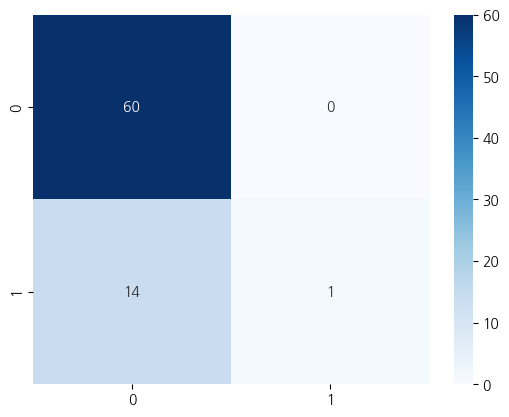

In [196]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [187]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}